
--- Running Task 02: K-Means Clustering ---

--- K-Means Results (k=5) ---
Cluster Sizes:
Cluster
0    37
1    25
2    53
3    54
4    31
Name: count, dtype: int64

Cluster Centroids:
[[55.16 38.62]
 [83.44 31.36]
 [30.08 81.13]
 [62.17 58.3 ]
 [93.68 16.  ]]


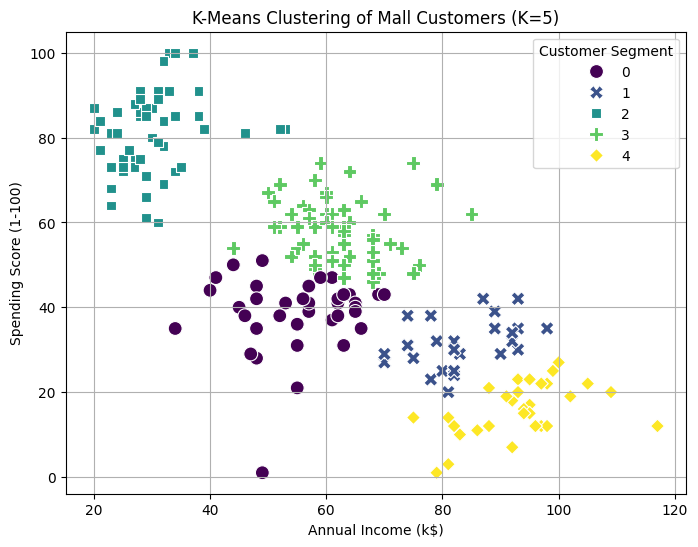

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Running Task 02: K-Means Clustering ---")

# 1. Create a Simulated Dataset
np.random.seed(42)
n_samples = 200

# Feature 1: Annual Income (k$)
income = np.concatenate([
    np.random.normal(30, 5, 50),   # Low Income
    np.random.normal(60, 10, 100), # Medium Income
    np.random.normal(90, 10, 50)   # High Income
]).round(0)

# Feature 2: Spending Score (1-100)
score = np.concatenate([
    np.random.normal(80, 10, 50),  # High Spenders (Low Income)
    np.random.normal(50, 15, 100), # Medium Spenders
    np.random.normal(20, 10, 50)   # Low Spenders (High Income)
]).clip(1, 100).round(0)

data = pd.DataFrame({
    'CustomerID': range(1, n_samples + 1),
    'Annual Income (k$)': income,
    'Spending Score (1-100)': score
})

# 2. Determine Optimal Clusters (Elbow Method - For demonstration)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Typically, k=4 or k=5 is chosen for this type of data, let's pick K=5.
k = 5

# 3. Implement K-Means Clustering
kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
data['Cluster'] = kmeans_model.fit_predict(X)

# 4. Evaluation and Output (Visualization is key for clustering)
print(f"\n--- K-Means Results (k={k}) ---")
print("Cluster Sizes:")
print(data['Cluster'].value_counts().sort_index())
print("\nCluster Centroids:")
print(kmeans_model.cluster_centers_.round(2))

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=data, palette='viridis', style='Cluster', s=100)
plt.title(f'K-Means Clustering of Mall Customers (K={k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()